# Data project test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import ipywidgets as widgets
import os

%load_ext autoreload
%autoreload 2

# local modules
import dataproject

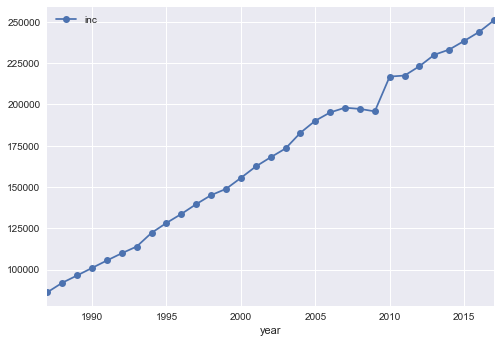

In [3]:
# a. Load
inc = pd.read_excel('average_income.xlsx', skiprows=2)

# b. clean and rename
inc.drop([f'Unnamed: {i}' for i in range(3)], axis=1, inplace=True)
inc.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)
inc.rename(columns = {str(i): f'inc{i}' for i in range(1987,2018)}, inplace=True)
inc.drop(inc.tail(2).index, inplace=True) # Delete last 2 rows

# c. remove regions
I = inc.municipality.str.contains('Landsdel')
inc.loc[I, :]
inc = inc.loc[I == False] # Keeps everything besides region

# d. change to long format
inc_tall = pd.wide_to_long(inc, stubnames='inc', i='municipality', j='year')
inc_tall = inc_tall.reset_index()

# e. create interactive figure
def plot_e(dataframe, municipality):
    I = dataframe['municipality'] == municipality
    ax=dataframe.loc[I,:].plot(x='year', y='inc', style='-o', legend='False')

widgets.interact(plot_e, 
    dataframe = widgets.fixed(inc_tall), 
    municipality = widgets.Dropdown(description='municipality', options=inc_tall.municipality.unique(), value='Lejre')
);

# Read and clean data

## Employment data

**Read the employment data** in ``RAS200.xlsx`` and **clean it** removing and renaming columns:

In [ ]:
# a. load
empl = pd.read_excel('RAS200.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
empl.drop(drop_these, axis=1, inplace=True)

# c. rename columns
empl.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

The dataset now looks like this:

In [ ]:
empl.head()

**Remove all rows which are not municipalities**:

In [ ]:
empl = dataproject.only_keep_municipalities(empl)
empl.head()

**Convert the dataset to long format**:

In [ ]:
# a. rename year columns
mydict = {str(i):f'employment{i}' for i in range(2008,2018)}
empl.rename(columns = mydict, inplace=True)

# b. convert to long
empl_long = pd.wide_to_long(empl, stubnames='employment', i='municipality', j='year').reset_index()

# c. show
empl_long.head()

## Income data

**Read the income data** in ``INDKP101.xlsx`` and **clean it**:

In [ ]:
# a. load
inc = pd.read_excel('INDKP101.xlsx', skiprows=2)

# b. drop and rename columns
inc.drop([f'Unnamed: {i}' for i in range(3)], axis=1, inplace=True)
inc.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)

# c. drop rows with missing
inc.dropna(inplace=True)

# d. remove non-municipalities
inc = dataproject.only_keep_municipalities(inc)

# e. convert to long
inc.rename(columns = {str(i):f'income{i}' for i in range(1986,2018)}, inplace=True)
inc_long = pd.wide_to_long(inc, stubnames='income', i='municipality', j='year').reset_index()

# f. show
inc_long.head(5)

> **Note:** The function ``dataproject.only_keep_municipalities()`` is used on both the employment and the income datasets.

## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [ ]:
def plot_empl_inc(empl,inc,dataset,municipality): 
    
    if dataset == 'Employment':
        df = empl
        y = 'employment'
    else:
        df = inc
        y = 'income'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

In [ ]:
widgets.interact(plot_empl_inc, 
    
    empl = widgets.fixed(empl_long),
    inc = widgets.fixed(inc_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Employment','Income']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=empl_long.municipality.unique())
                 
); 

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. We can illustrate this **merge** as:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('inc', 'empl'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

In [ ]:
merged = pd.merge(empl_long, inc_long, how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [ ]:
merged.groupby('year').agg(['mean','std']).round(2)

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.